

## 1. Transformada Discreta de Fourier (DFT)

A **Transformada Discreta de Fourier (DFT)** é uma ferramenta fundamental no processamento digital de sinais, permitindo a análise espectral de sinais discretos de duração finita. Segundo Diniz et al., a DFT mapeia uma sequência de $N$ amostras no domínio do tempo, $x(n)$, para uma sequência de $N$ coeficientes no domínio da frequência, $X(k)$.

A equação de análise (DFT direta) é definida como:

$$
X(k) = \sum_{n=0}^{N-1} x(n) W_N^{kn}, \quad \text{para } 0 \le k \le N-1
$$

Onde:
- **$x(n)$:** Amostra do sinal no tempo discreto.
- **$X(k)$:** Coeficiente da DFT na frequência discreta $k$.
- **$W_N$:** O núcleo da transformação, conhecido como **fator de torção** (ou *twiddle factor*).

---

## 2. O Método Matricial (DFT Matricial)

No livro de Diniz, a ênfase na implementação matricial surge da observação de que a somatória da DFT é uma operação linear. Para uma sequência de comprimento $N$, a DFT pode ser expressa de forma compacta utilizando álgebra linear.

Definindo os vetores coluna para o sinal de entrada $\mathbf{x}$ e para o espectro de saída $\mathbf{X}$:

$$
\mathbf{x} = [x(0), x(1), \dots, x(N-1)]^T
$$
$$
\mathbf{X} = [X(0), X(1), \dots, X(N-1)]^T
$$

A relação entre eles é dada pela equação matricial:

$$
\mathbf{X} = \mathbf{W}_N \mathbf{x}
$$

### 2.1 A Matriz da DFT ($\mathbf{W}_N$)

A matriz de transformação $\mathbf{W}_N$, de dimensão $N \times N$, contém todos os termos exponenciais complexos necessários para o cálculo. O elemento na linha $k$ e coluna $n$ da matriz é definido como:

$$
[\mathbf{W}_N]_{kn} = W_N^{kn} = e^{-j \frac{2\pi}{N} kn}
$$

Expandindo a matriz, temos a estrutura completa utilizada no algoritmo matricial:

$$
\mathbf{W}_N =
\begin{bmatrix}
W_N^0 & W_N^0 & W_N^0 & \cdots & W_N^0 \\
W_N^0 & W_N^1 & W_N^2 & \cdots & W_N^{N-1} \\
W_N^0 & W_N^2 & W_N^4 & \cdots & W_N^{2(N-1)} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
W_N^0 & W_N^{N-1} & W_N^{2(N-1)} & \cdots & W_N^{(N-1)(N-1)}
\end{bmatrix}
$$

**Propriedades Importantes da Matriz:**
* **Simetria:** A matriz $\mathbf{W}_N$ é simétrica, isto é, $\mathbf{W}_N^T = \mathbf{W}_N$.
* **Inversa:** A transformada inversa pode ser calculada usando a propriedade de que $\mathbf{W}_N^{-1} = \frac{1}{N} \mathbf{W}_N^*$, onde $*$ denota o conjugado complexo.

### 2.2 Complexidade e Desempenho (Análise do Livro)

A implementação direta da equação $\mathbf{X} = \mathbf{W}_N \mathbf{x}$ revela o custo computacional do método matricial:

* **Multiplicações Complexas:** A multiplicação de uma matriz $N \times N$ por um vetor $N \times 1$ requer $N^2$ multiplicações.
* **Adições Complexas:** Requer $N(N-1)$ adições.

Segundo Diniz, "a complexidade da DFT cresce com o quadrado do comprimento do sinal". Para sinais longos, esse crescimento quadrático ($O(N^2)$) torna o método matricial impraticável em tempo real, limitando severamente seu uso prático sem algoritmos de otimização.

---

## 3. Comparação com a FFT

Para mitigar o problema da complexidade $N^2$, utiliza-se a **Transformada Rápida de Fourier (FFT)**. O livro destaca o algoritmo de *Cooley-Tukey* (decimação no tempo ou na frequência) como a solução padrão.

### Diferença de Desempenho

A FFT explora a simetria e a periodicidade dos fatores $W_N^{kn}$ para decompor a DFT de tamanho $N$ em DFTs menores. A complexidade resultante é proporcional a:

$$
\text{Complexidade FFT} \approx N \log_2 N
$$

A disparidade de desempenho citada na literatura (Diniz et al.) é ilustrada pela razão de eficiência:

| Tamanho $N$ | Operações DFT Matricial ($N^2$) | Operações FFT ($N \log_2 N$) | Redução de Esforço |
| :---: | :---: | :---: | :---: |
| **64** | 4.096 | 384 | ~10x |
| **1024** | 1.048.576 | 10.240 | ~100x |

[cite_start]O gráfico gerado pelo código `tempo_dft_vs_fft_pt.py` confirmará visualmente esta teoria: a curva da DFT Matricial crescerá exponencialmente (parábola), enquanto a da FFT permanecerá quase linear (linear-logarítmica), comprovando que a FFT é indispensável para aplicações como processamento de áudio e imagens onde $N$ é grande[cite: 1577].

# Implementações da DFT em Python

## 1. Funções DFT

Este bloco de código apresenta três implementações da Transformada Discreta de Fourier (DFT) em NumPy. Cada função ilustra uma abordagem diferente: produto matricial direto, versão otimizada para sinais reais e implementação iterativa explícita. Abaixo está uma explicação organizada para inserir em um notebook Jupyter.

---

## Visão geral

- **Objetivo**: comparar e entender diferentes formas de calcular a DFT em Python.  
- **Bibliotecas usadas**: `numpy`, `time`, `matplotlib.pyplot` (apenas suporte para medições e visualização).  
- **Formato**: cada função recebe um vetor `x` (1D, complex ou real) e retorna o vetor `X` com os coeficientes espectrais.

---

## Funções e descrição

### dft_matricial_padrao
- **O que faz**: constrói explicitamente a matriz \(W\) de dimensão \(N \times N\) com elementos \(W_{k,n} = e^{-2j\pi k n / N}\) e calcula \(X = W @ x\).  
- **Entrada**: `x` vetor de comprimento `N`.  
- **Saída**: `X` vetor complexo com `N` coeficientes.  
- **Complexidade**: **O(N²)** em tempo e **O(N²)** em memória (por armazenar a matriz completa).  
- **Quando usar**: apenas para fins didáticos ou para N pequeno; útil para validar implementações.

### dft_matricial_real_otimizada
- **O que faz**: aproveita a **simetria conjugada** da DFT para sinais reais. Calcula apenas a primeira metade das frequências (incluindo DC e, se existir, Nyquist) e reconstrói a segunda metade por espelhamento conjugado.  
- **Entrada**: `x` vetor real (ou complexo, mas a otimização é válida para reais).  
- **Saída**: `X` vetor complexo com `N` coeficientes (reconstruído completo).  
- **Complexidade**: aproximadamente **metade** das operações da versão matricial completa; ainda **O(N²)** em termos de ordem, mas com fator constante reduzido.  

### dft_iterativa
- **O que faz**: implementação direta da fórmula da DFT usando loops `for` aninhados (soma explícita para cada `k`).  
- **Entrada**: `x` vetor de comprimento `N`.  
- **Saída**: `X` vetor complexo com `N` coeficientes.  
- **Complexidade**: **O(N²)** em tempo, mas com grande sobrecarga em Python devido aos loops interpretados — **muito lenta** para N moderado/grande.  
- **Quando usar**: apenas para fins pedagógicos, para ver claramente a fórmula e o processo de somatório.



In [72]:
import numpy as np
import time
import matplotlib.pyplot as plt

# =============================================================================
# 1. IMPLEMENTAÇÕES DOS ALGORITMOS
# =============================================================================

def dft_matricial_padrao(x,N):
    """
    Abordagem 1: Matricial Completa.
    Gera a matriz W (NxN) e multiplica.
    Complexidade: O(N^2).
    """

    n = np.arange(N)
    k = n.reshape((N, 1))
    W = np.exp(-2j * np.pi * k * n / N) 
    return W @ x

def dft_matricial_real_otimizada(x,N):
    """
    Abordagem 2: Matricial Otimizada para Sinais Reais.
    Calcula apenas a primeira metade das frequências e usa simetria.
    Reduz o custo em aprox. 50%.
    """

    K_limit = N // 2 + 1
    
    n = np.arange(N)
    k = np.arange(K_limit).reshape((K_limit, 1))
    
    # 1. Matriz Reduzida (Apenas metade das linhas)
    W_half = np.exp(-2j * np.pi * k * n / N)
    
    # 2. Multiplicação menor
    X_half = W_half @ x
    
    # 3. Reconstrução (Espelhamento conjugado)
    if N % 2 == 0:
        # Se par, exclui DC(0) e Nyquist(meio) do espelhamento
        X_rest = np.conj(X_half[1:-1][::-1])
    else:
        # Se ímpar, exclui apenas DC
        X_rest = np.conj(X_half[1:][::-1])
        
    return np.concatenate((X_half, X_rest))

def dft_iterativa(x,N):
    """
    Abordagem 3: Iterativa (Laços Explícitos).
    Extremamente lenta em Python, mas útil para entender a fórmula.
    """
    N = len(x)
    X = np.zeros(N, dtype=complex)
    for k in range(N):
        soma = 0
        for n in range(N):
            soma += x[n] * np.exp(-2j * np.pi * k * n / N)
        X[k] = soma
    return X

## 2. Validação 

Este bloco de código valida a **corretude** das três implementações didáticas da DFT (matricial padrão, matricial otimizada para sinais reais e iterativa) comparando-as com a **FFT do NumPy**. Em seguida plota os espectros (módulo dos coeficientes) para inspeção visual.

---

### Sinal de Teste

- O sinal gerado tem comprimento `N` (padrão `N=32`).
- Composição do sinal:
  - **DC** de amplitude `1.0`
  - **Componente cosseno** na frequência `k=3` com amplitude `1.0`
  - **Componente seno** na frequência `k=10` com amplitude `0.5`


--- Validação de Corretude (N=32) ---
Erro Máximo (vs FFT):
  Matricial Padrão:    6.68e-14
  Matricial Otimizada: 2.66e-14
  Iterativa:           6.65e-14


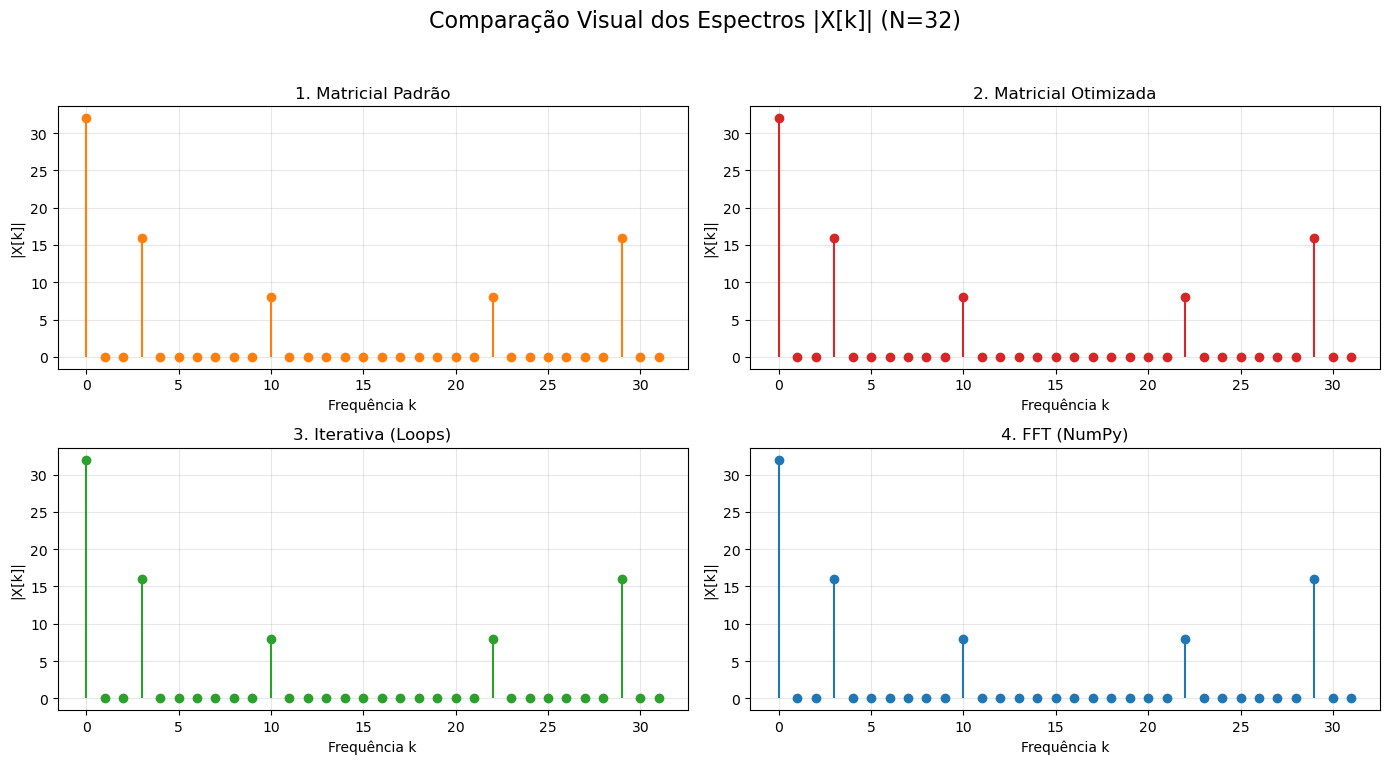

In [73]:
def validar_e_plotar_espectros(N=32):
    print(f"--- Validação de Corretude (N={N}) ---")
    
    # 1. Gerar Sinal de Teste
    n = np.arange(N)
    # DC(1.0) + Freq 3 + Freq 10
    x = 1.0 + 1.0 * np.cos(2 * np.pi * 3 * n / N) + 0.5 * np.sin(2 * np.pi * 10 * n / N)

    # 2. Calcular DFTs
    X_pad = dft_matricial_padrao(x,N)
    X_opt = dft_matricial_real_otimizada(x,N)
    X_iter = dft_iterativa(x,N)
    X_fft = np.fft.fft(x) # Referência

    # 3. Calcular Erros (Comparado à FFT)
    err_pad = np.max(np.abs(X_pad - X_fft))
    err_opt = np.max(np.abs(X_opt - X_fft))
    err_iter = np.max(np.abs(X_iter - X_fft))
    
    print(f"Erro Máximo (vs FFT):")
    print(f"  Matricial Padrão:    {err_pad:.2e}")
    print(f"  Matricial Otimizada: {err_opt:.2e}")
    print(f"  Iterativa:           {err_iter:.2e}")

    # 4. Plotagem
    fig, axs = plt.subplots(2, 2, figsize=(14, 8))
    fig.suptitle(f'Comparação Visual dos Espectros |X[k]| (N={N})', fontsize=16)

    metodos = [
        (X_pad, '1. Matricial Padrão', 'tab:orange'),
        (X_opt, '2. Matricial Otimizada', 'tab:red'),
        (X_iter, '3. Iterativa (Loops)', 'tab:green'),
        (X_fft, '4. FFT (NumPy)', 'tab:blue')
    ]

    for i, ax in enumerate(axs.flat):
        dados, titulo, cor = metodos[i]
        # Plot Stem (Pirulito)
        marker, stemlines, baseline = ax.stem(np.arange(N), np.abs(dados), basefmt=" ")
        plt.setp(stemlines, 'color', cor)
        plt.setp(marker, 'color', cor)
        
        ax.set_title(titulo)
        ax.set_ylabel('|X[k]|')
        ax.set_xlabel('Frequência k')
        ax.grid(True, alpha=0.3)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Executa a validação
validar_e_plotar_espectros()

## 3. Análise Computacional (Benchmark)

### Função auxiliar de medição e benchmark

#### Descrição
Este bloco contém duas funções auxiliares para **medir tempos de execução** de diferentes implementações da DFT e **rodar um benchmark** comparativo entre elas e a FFT do NumPy. Use-as para avaliar desempenho prático e visualizar a ordem de crescimento dos tempos.

---

#### Funções

- **`tempo_execucao(func, args=(), n_repeticoes=3)`**  
  - **O que faz**: mede o tempo médio de execução de `func(*args)` em segundos.  
  - **Comportamento especial**: executa uma chamada de aquecimento (uma vez) para funções rápidas, exceto para `dft_iterativa` (evita aquecimento para a versão iterativa por ser muito lenta).  
  - **Retorno**: tempo médio (float) calculado sobre `n_repeticoes`.

- **`rodar_benchmark(Ns)`**  
  - **O que faz**: para cada tamanho `N` em `Ns`, gera um vetor aleatório `x` e mede o tempo médio das seguintes rotinas:
    1. `dft_matricial_padrao`
    2. `dft_matricial_real_otimizada`
    3. `dft_iterativa` (executada apenas para `N <= 512` por segurança)
    4. `np.fft.fft` (referência)
  - **Saída**:
    - Impressão formatada em tabela com tempos por `N`.
    - Dois gráficos:
      - **Linear**: tempo real vs `N`.
      - **Log-log**: tempo vs `N` em escala logarítmica para visualizar ordens de complexidade.
  - **Ajustes internos**:
    - Número de repetições reduzido para `N` grandes (`reps = 10` para `N < 256`, caso contrário `reps = 5`).
    - Para a versão iterativa, repetições reduzidas (`reps_it = 3` se `N < 128` else `1`) e não executa para `N > 512`.
    - A FFT é medida com `n_repeticoes=20` para maior estabilidade estatística.

---

#### Parâmetros e escolhas de projeto

- **Tamanhos testados**: `Ns_teste = [16, 32, 64, 128, 256, 512, 1024, 2048]`  
  - Permite observar o ponto em que a FFT supera claramente as implementações matriciais.
- **Limite para iterativa**: `N <= 512` para evitar travamentos e tempos excessivos.
- **Aquecimento**: evita medir a sobrecarga de inicialização em funções rápidas; não aplicado à iterativa para não aumentar custo.

---

#### Interpretação dos gráficos

- **Gráfico linear**:
  - Mostra tempos absolutos; útil para ver latências reais e comparar implementações em valores práticos de `N`.
- **Gráfico log-log**:
  - Permite visualizar a **ordem de complexidade**. Espera-se:
    - Matricial padrão e otimizada com crescimento aproximado \(O(N^2)\).
    - FFT com crescimento aproximado \(O(N \log N)\).
  - No log-log, curvas polinomiais aparecem como linhas com inclinação proporcional ao expoente.



N      | Mat. Padrão  | Mat. Otimizada  | Iterativa    | FFT       
---------------------------------------------------------------------------
16     | 0.00002s    | 0.00001s        | 0.00020s     | 0.00000s
32     | 0.00002s    | 0.00002s        | 0.00079s     | 0.00000s
64     | 0.00007s    | 0.00004s        | 0.00319s     | 0.00000s
128    | 0.00037s    | 0.00014s        | 0.01274s     | 0.00000s
256    | 0.00162s    | 0.00068s        | 0.04992s     | 0.00001s
512    | 0.00584s    | 0.00302s        | 0.20319s     | 0.00001s
1024   | 0.02347s    | 0.01181s        | ---          | 0.00001s
2048   | 0.09098s    | 0.04585s        | ---          | 0.00001s


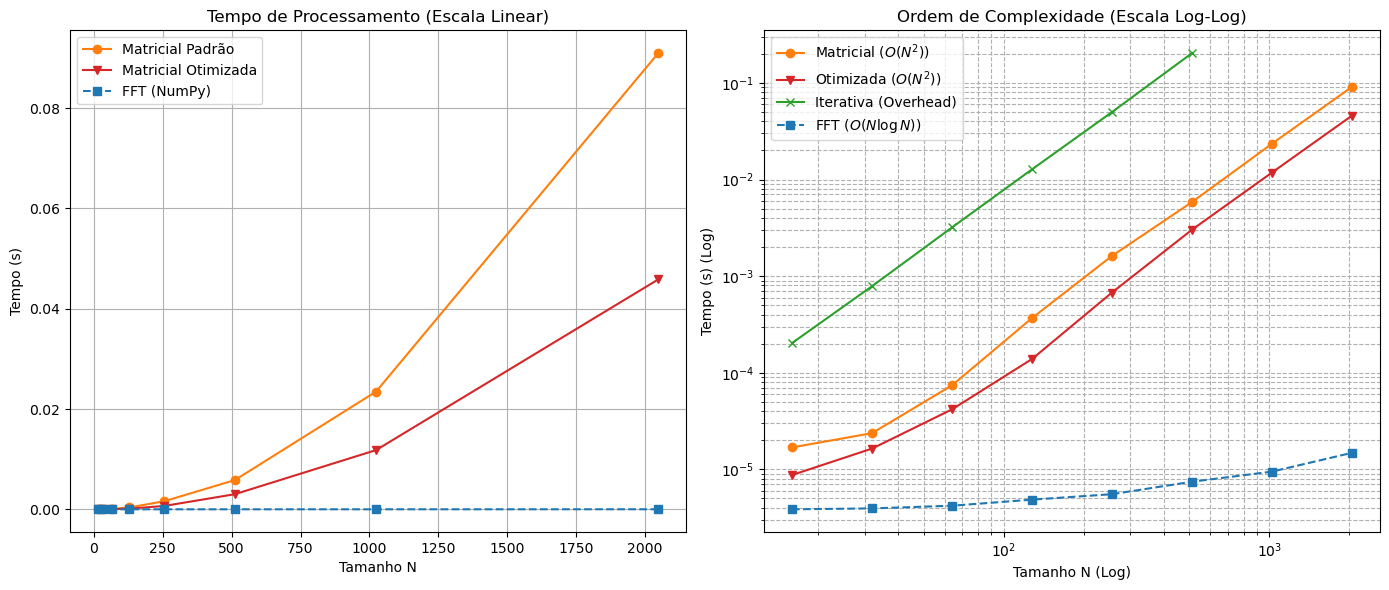

In [74]:
# Função auxiliar de medição
def tempo_execucao(func, args=(), n_repeticoes=3):
    # Aquecimento se for rápido
    if func != dft_iterativa: func(*args)
    
    tempos = []
    for _ in range(n_repeticoes):
        t0 = time.perf_counter()
        func(*args)
        tempos.append(time.perf_counter() - t0)
    return float(np.mean(tempos))

def rodar_benchmark(Ns):
    t_pad, t_opt, t_iter, t_fft = [], [], [], []
    
    print(f"{'N':<6} | {'Mat. Padrão':<12} | {'Mat. Otimizada':<15} | {'Iterativa':<12} | {'FFT':<10}")
    print("-" * 75)

    for N in Ns:
        x = np.random.randn(N)
        # Menos repetições para N grande
        reps = 10 if N < 256 else 5
        
        # 1. Matricial Padrão
        tm = tempo_execucao(dft_matricial_padrao, args=(x,N), n_repeticoes=reps)
        t_pad.append(tm)
        
        # 2. Matricial Otimizada
        to = tempo_execucao(dft_matricial_real_otimizada, args=(x,N), n_repeticoes=reps)
        t_opt.append(to)
        
        # 3. Iterativa (Com limite de segurança)
        if N <= 512: # Limite para não travar
            # Reduz repetições da iterativa
            reps_it = 3 if N < 128 else 1
            ti = tempo_execucao(dft_iterativa, args=(x,N), n_repeticoes=reps_it)
        else:
            ti = None # Não executa
        t_iter.append(ti)
        
        # 4. FFT
        tf = tempo_execucao(np.fft.fft, args=(x,), n_repeticoes=20)
        t_fft.append(tf)
        
        # Print formatado
        s_iter = f"{ti:.5f}s" if ti is not None else "---"
        print(f"{N:<6} | {tm:.5f}s    | {to:.5f}s        | {s_iter:<12} | {tf:.5f}s")

    # --- Plotagem dos Resultados ---
    
    # Prepara dados da Iterativa (remove None)
    mask_it = [t is not None for t in t_iter]
    Ns_it = [n for n, m in zip(Ns, mask_it) if m]
    t_it_clean = [t for t in t_iter if t is not None]

    plt.figure(figsize=(14, 6))

    # Gráfico 1: Linear (Tempo Real)
    plt.subplot(1, 2, 1)
    plt.plot(Ns, t_pad, 'o-', label='Matricial Padrão', color='tab:orange')
    plt.plot(Ns, t_opt, 'v-', label='Matricial Otimizada', color='tab:red')
    #plt.plot(Ns_it, t_it_clean, 'x-', label='Iterativa (Python)')
    plt.plot(Ns, t_fft, 's--', label='FFT (NumPy)', color='tab:blue')
    
    plt.xlabel('Tamanho N')
    plt.ylabel('Tempo (s)')
    plt.title('Tempo de Processamento (Escala Linear)')
    plt.legend()
    plt.grid(True)

    # Gráfico 2: Log-Log (Complexidade)
    plt.subplot(1, 2, 2)
    plt.loglog(Ns, t_pad, 'o-', label=r'Matricial ($O(N^2)$)', color='tab:orange')
    plt.loglog(Ns, t_opt, 'v-', label=r'Otimizada ($O(N^2)$)', color='tab:red')
    plt.loglog(Ns_it, t_it_clean, 'x-', label=r'Iterativa (Overhead)', color='tab:green')
    plt.loglog(Ns, t_fft, 's--', label=r'FFT ($O(N \log N)$)', color='tab:blue')
    
    plt.xlabel('Tamanho N (Log)')
    plt.ylabel('Tempo (s) (Log)')
    plt.title('Ordem de Complexidade (Escala Log-Log)')
    plt.legend()
    plt.grid(True, which="both", ls="--")

    plt.tight_layout()
    plt.show()

# Definição dos Tamanhos e Execução
# Vai até 2048 para ver a FFT brilhar, mas a iterativa para antes.
Ns_teste = [16, 32, 64, 128, 256, 512, 1024, 2048]
rodar_benchmark(Ns_teste)